In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
class Perceptron():
    def __init__(self, alpha, epochs):
        self.alpha = alpha
        self.epochs = epochs
        self.w = None
        self.b = None
        self.train_errors = []
        self.validation_errors = []

    def train(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for epoch in range(self.epochs):
            # Forward pass
            y_pred_train = self.predict(x_train)

            # Compute errors
            train_error = self.rmse(y_train, y_pred_train)
            if epoch % 100 == 0:
                print(f"rmse error in epoch {epoch} is {train_error}")

            # Update lists of errors
            self.train_errors.append(train_error)

            # Backpropagation
            error = y_train - y_pred_train

            # Update weights and bias using gradient descent
            self.w += self.alpha * np.dot(x_train.T, error) / n_samples
            self.b += self.alpha * np.sum(error) / n_samples

    def predict(self, x_test):
        return np.dot(x_test, self.w) + self.b

    def rmse(self, y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

    def plot_learning_curve(self, n):
        plt.plot(range(1, self.epochs + 1), self.train_errors, label='Training Error')
        plt.xlabel('Epochs')
        plt.ylabel(f"learning curve for Teylor Series with alpha {n} sentence")
        plt.title('Learning Curve')
        plt.legend()
        plt.show()

    def plot_functions(self, x_range, target_function, title, dataset=None):
        plt.plot(x_range, target_function, label='Target Function', color='red')
        predicted_function =  self.predict(dataset)
        plt.plot(x_range, predicted_function, label='Predicted Function', color='blue')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Predicted vs. Target Function for {title}')
        plt.legend()
        plt.show()

    def print_formula(self, powers, k):
        from IPython.display import display, Math,Latex
        formula = 'y = '
        for i, power in enumerate(powers):
            if power == 0:
                formula += f'{self.b:.5f}'
            else:
                formula += f'{self.w[i]:.5f}x^{{{power}}}'
            formula += ' + '
        if k < 17:
            formula += f'{self.w[-2]:.5f}x^{{{2}}}'
            formula += ' + '
            formula += f'{self.w[-1]:.5f}x^{{{17}}}'
        else:
            formula += f'{self.w[-1]:.5f}x^{{{2}}}'
        display(Math(formula))


Number of Sentence = 1
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

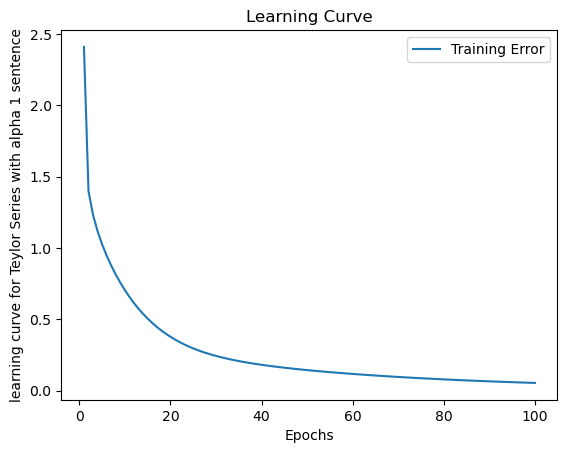

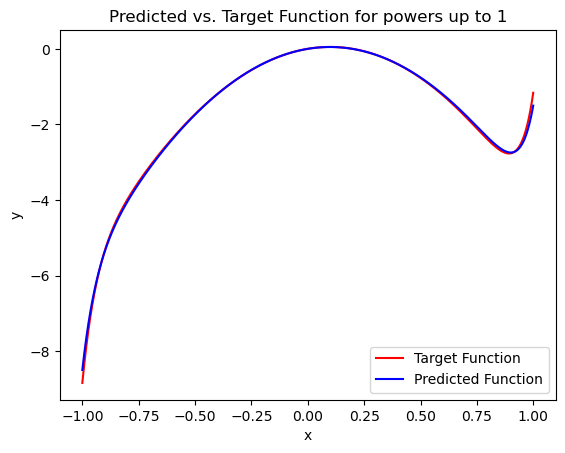

Number of Sentence = 3
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

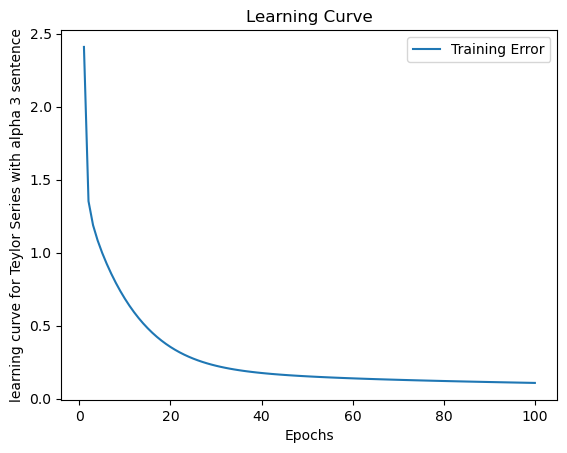

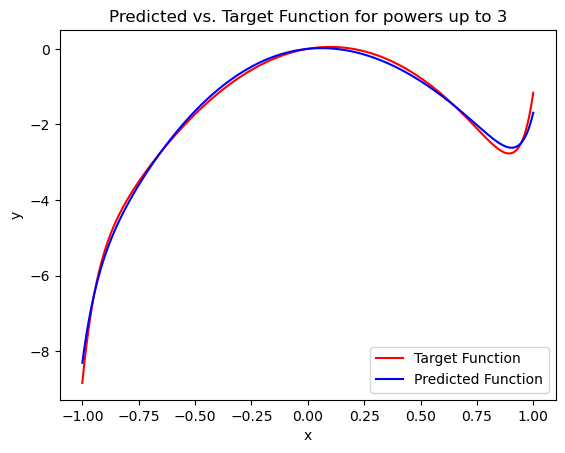

Number of Sentence = 5
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

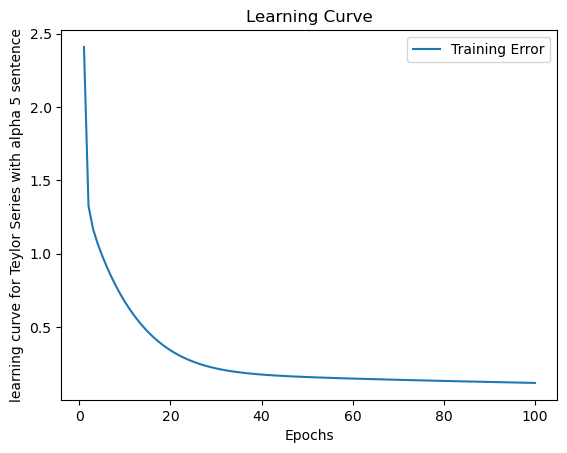

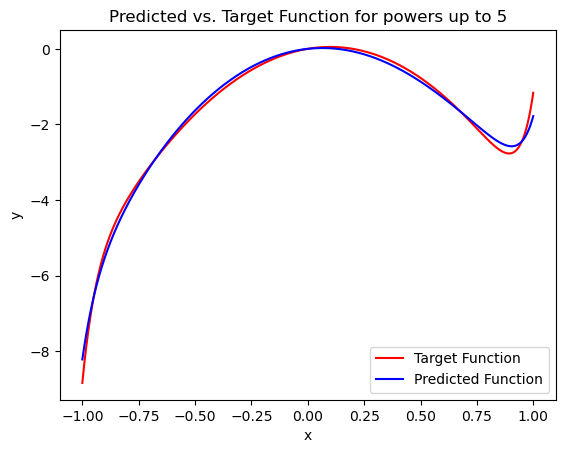

Number of Sentence = 7
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

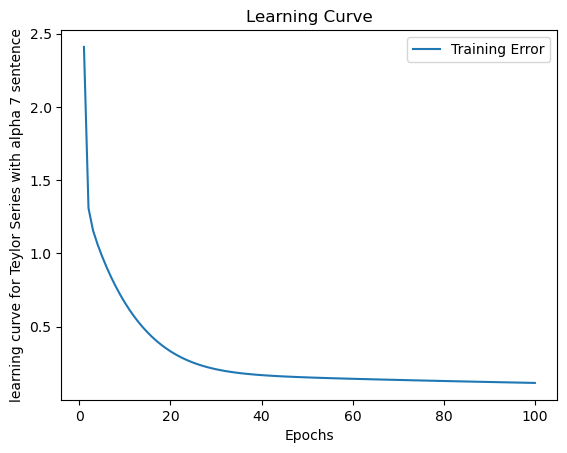

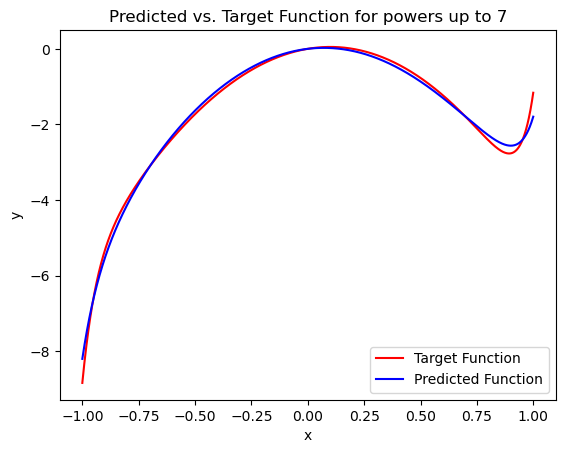

Number of Sentence = 9
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

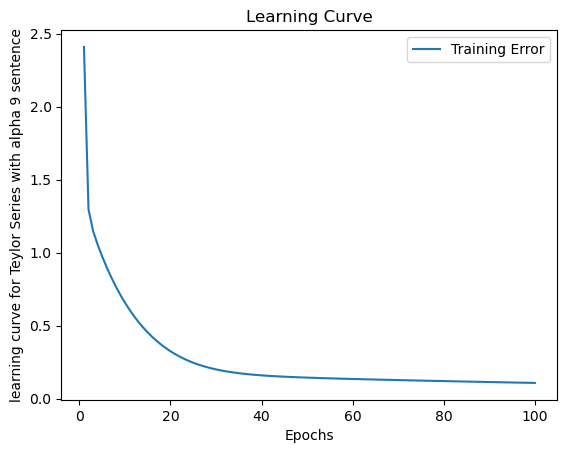

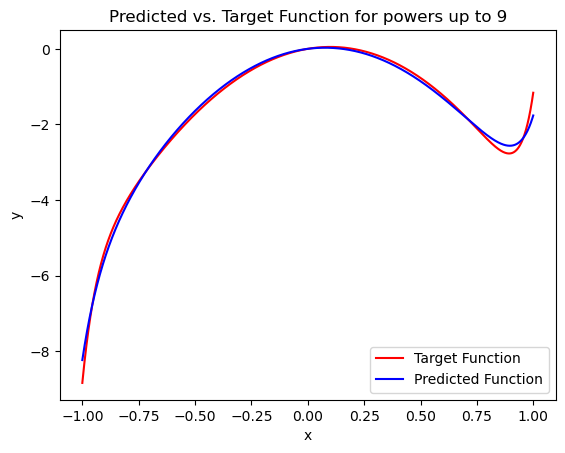

Number of Sentence = 11
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

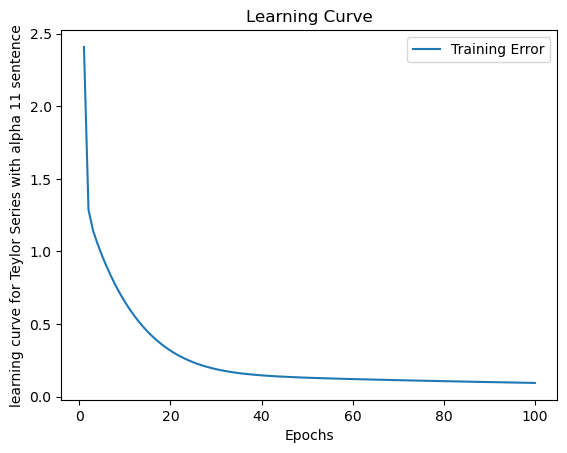

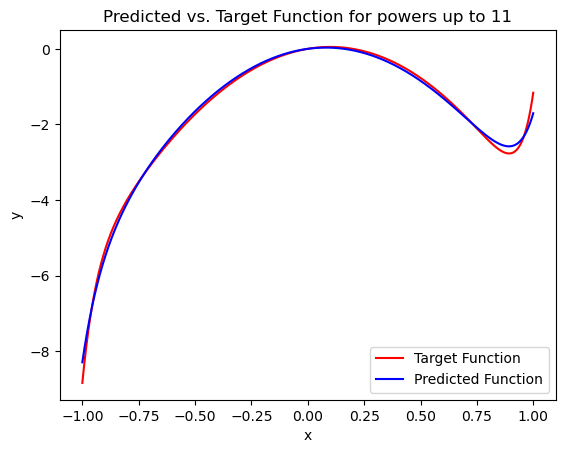

Number of Sentence = 13
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

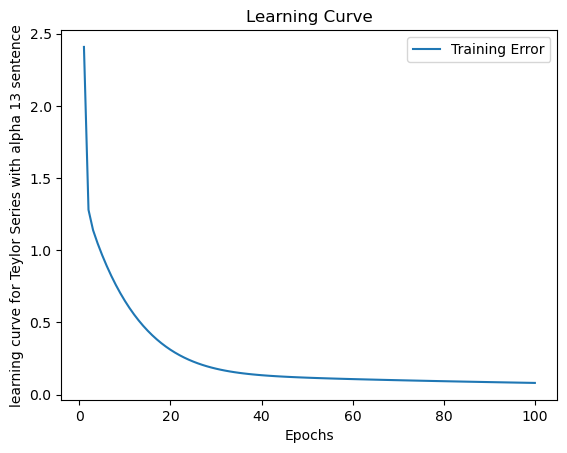

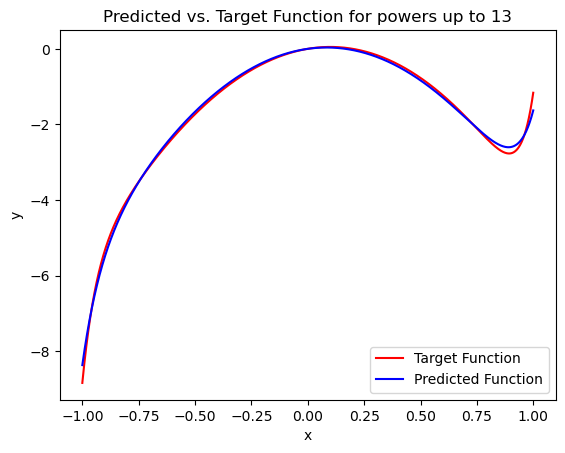

Number of Sentence = 15
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

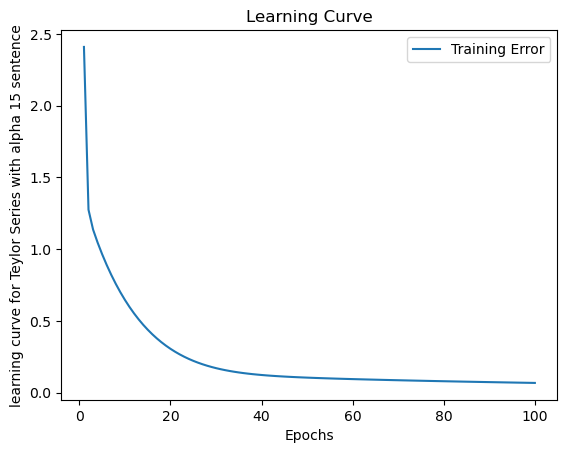

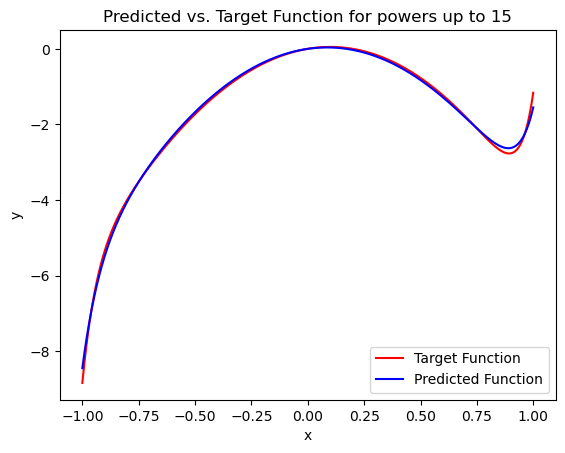

Number of Sentence = 17
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

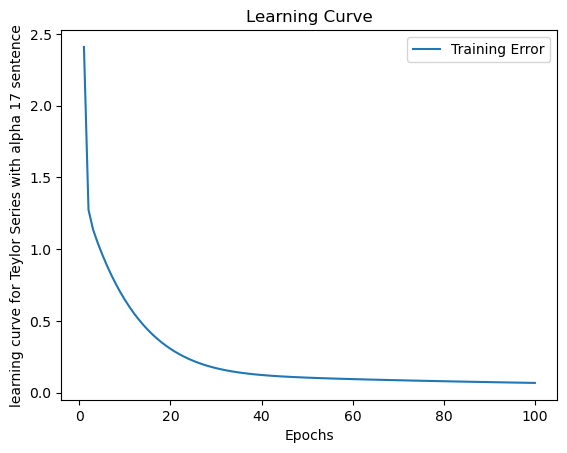

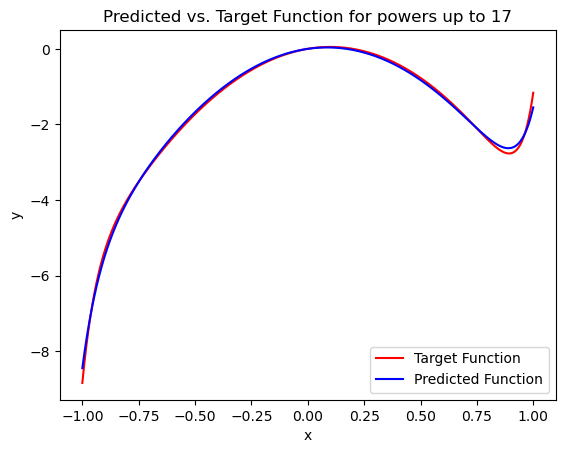

Number of Sentence = 19
rmse error in epoch 0 is 2.408741782869337


<IPython.core.display.Math object>

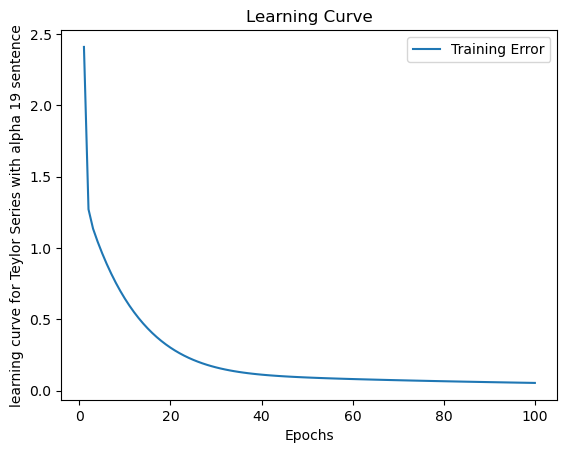

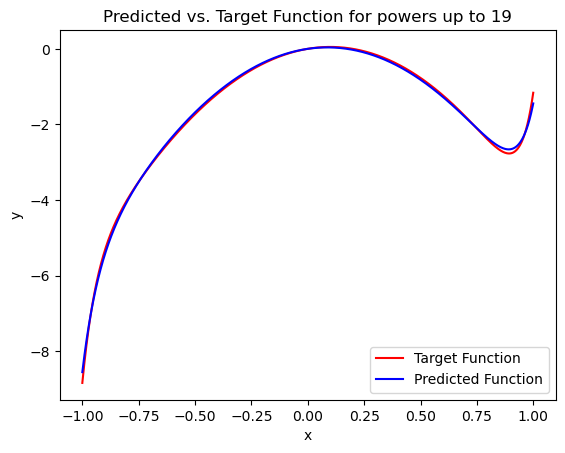

In [3]:
import numpy as np

x_range = np.arange(-1, 1, 0.0001)
target = np.array(np.sin(x_range) + (3*(x_range**17)) - (5 * (x_range**2)))
predictions = []
weights = []

for i in range(1, 20, 2):
    print(f"Number of Sentence = {i}")

    powers = np.arange(1, i + 1, 2)
    dataset = np.column_stack([x_range ** power for power in powers])
    dataset = np.column_stack((dataset, x_range**2))
    if i < 17:
        dataset = np.column_stack((dataset, x_range**17))

    perceptron = Perceptron(alpha=1, epochs=100)

    # Train the Perceptron
    perceptron.train(dataset, target)
    # Print the formula of the function
    perceptron.print_formula(powers, i)

    # Plot the learning curve
    perceptron.plot_learning_curve(i)

    # Store the predictions
    predictions.append(perceptron.predict(dataset))
    perceptron.plot_functions(x_range, target, f"powers up to {i}", dataset)



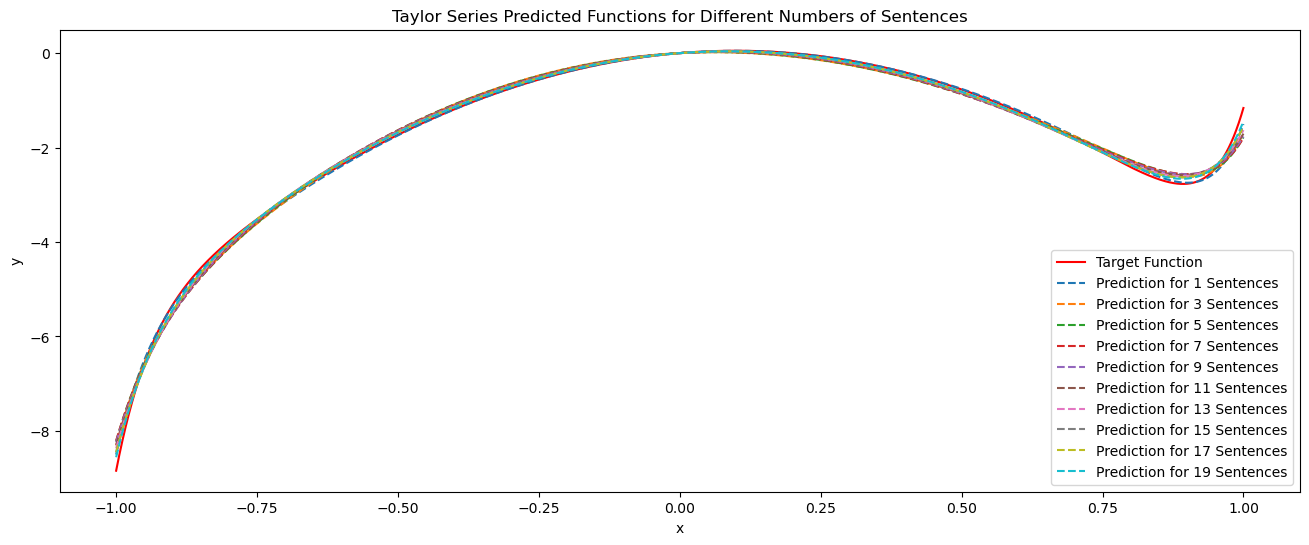

In [4]:
plt.figure(figsize=(16, 6))
plt.plot(x_range, target, label='Target Function', color='red')
for i, prediction in enumerate(predictions):
    plt.plot(x_range, prediction, label=f'Prediction for {i*2+1} Sentences', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Taylor Series Predicted Functions for Different Numbers of Sentences')
plt.legend()
plt.show()
